In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import norm
import DiadFit as pf

## Load in the standard data

In [102]:
## Loading the microtherm data
df_Tm=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Standards_microthermometry')

# Load the Excel sheet
# df =pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
#                           sheet_name='Standard_repeatability')
df=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Standard_Tracking\FI standard tracking.xlsx')

df['date_clean'] = df['date'].astype(str).str.strip()

# Now convert to datetime format (automatically handles multiple formats)
df['date_clean'] = pd.to_datetime(df['date_clean'], errors='coerce')


# recalibration date when Raman was moved to the temp-controlled lab. 
date_recal=datetime(2024, 4, 8)

# Create or clear the 'std_name' column
df['Standard_Name'] = ''

# Normalize filename for comparison
normalized = df['filename'].str.lower().str.replace('-', '_', regex=False)

# Set std_name based on matching
mask4 = normalized.str.contains('fg04_a1_4', na=False)
df.loc[mask4, 'Standard_Name'] = 'FG04_A1_4'

mask1 = normalized.str.contains(r'fg04_a1_1(?!\d)', case=False, na=False)
df.loc[mask1, 'Standard_Name'] = 'FG04_A1_1'


mask2 = normalized.str.contains('fg04_a1_2', na=False)
df.loc[mask2, 'Standard_Name'] = 'FG04_A1_2'

mask101 = normalized.str.contains('fg19_101_a', na=False)
df.loc[mask101, 'Standard_Name'] = 'FG19_101_A'

mask16= normalized.str.contains('fg04_a1_16', na=False)
df.loc[mask16, 'Standard_Name'] = 'FG04_A1_16'

mask14= normalized.str.contains('fg04_a1_14', na=False)
df.loc[mask14, 'Standard_Name'] = 'FG04_A1_14'


maskFo= normalized.str.contains('fo', na=False)
df.loc[maskFo, 'Standard_Name'] = 'FO'


In [103]:
mask101C = normalized.str.contains('fg19_101_c', na=False)
df.loc[mask101C, 'Standard_Name'] = 'FG19_101_C'

In [104]:
import pandas as pd
from dateutil import parser

# First, clean up the strings (strip whitespace)
df['date_cleaned'] = df['date'].astype(str).str.strip()

# Try parsing each value with dateutil.parser.parse
def safe_parse(x):
    try:
        return parser.parse(x, fuzzy=True)
    except Exception:
        return pd.NaT

df['date'] = df['date_cleaned'].apply(safe_parse)


## No Neon correction

0.99793


Text(0, 0.5, 'Difference between using Daily Neon vs. first Neon (g/cm3)')

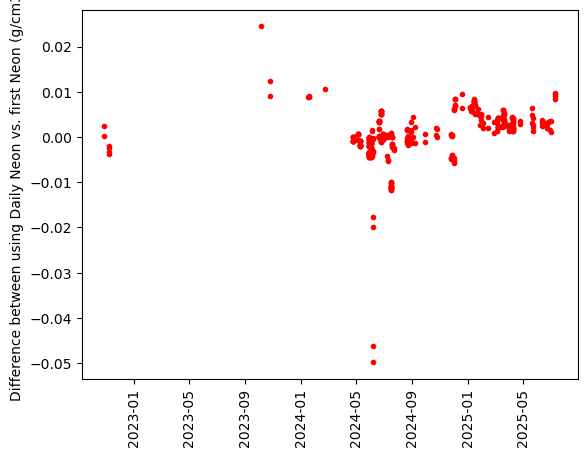

In [105]:
Preferred_Ne=np.nanmedian(df['preferred_values'].loc[df['date_clean']>date_recal])
import DiadFit as pf
df_no_corr=pf.calculate_density_ucb(corrected_split=df['Splitting']*np.nanmedian(df['preferred_values']), split_err=0
)
df['Density_no_neon']=df_no_corr['Density g/cm3']
print(Preferred_Ne)

df['Density_no_neon']=df_no_corr['Density g/cm3']

plt.plot(df['date'], df['Density_no_neon']-df['Density g/cm3'], '.r')
plt.xticks(rotation=90)
plt.ylabel('Difference between using Daily Neon vs. first Neon (g/cm3)')

## figure for paper FG04_1_4 - Typical Ne correction

C:\Users\penny\AppData\Local\Temp\ipykernel_15704\610028904.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


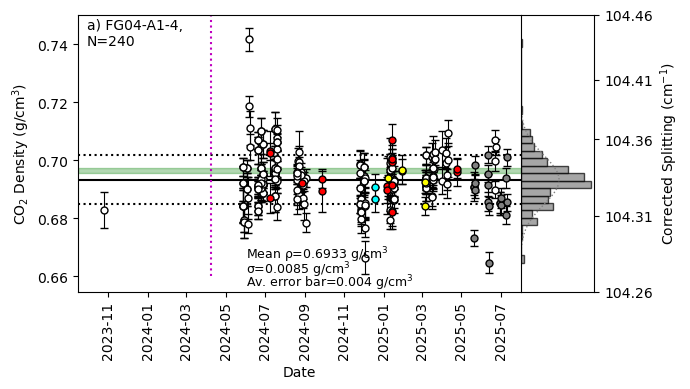

In [106]:


# Filtered DataFrame
df_a14 = df.loc[(df['Standard_Name'] == 'FG04_A1_4') & (df['Operator'] != 'ATB') & (df['σ Density g/cm3']<0.1)]

# Create figure and layout
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 0.5], wspace=0)




# === Left plot: density over time ===
ax1 = plt.subplot(gs[0])

# Set x limits
early = datetime(2023, 9, 15)
late = datetime(2025, 8, 1)
ax1.set_xlim([early, late])

# ax1.errorbar(df_a14['date'],
#              df_a14['Density g/cm3'],
#              yerr=df_a14['σ Density g/cm3'],
#              fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='PW')



# CLJD
ax1.errorbar(df_a14['date'][df_a14['Operator'] == 'CLJD'],
             df_a14['Density g/cm3'][df_a14['Operator'] == 'CLJD'],
             yerr=df_a14['σ Density g/cm3'][df_a14['Operator'] == 'CLJD'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='white', ms=5, mec='k', capsize=3, label='CD')


ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'Henry'], 
         df_a14['Density g/cm3'].loc[df_a14['Operator'] == 'Henry'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'Henry'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='yellow', ms=5, mec='k', capsize=3, label='HZ')

ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'MLMG'], 
         df_a14['Density g/cm3'].loc[df_a14['Operator'] == 'MLMG'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'MLMG'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='MG')


ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'IS'], 
         df_a14['Density g/cm3'].loc[df_a14['Operator'] == 'IS'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'IS'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='grey', ms=5, mec='k', capsize=3, label='MG')

# PW
ax1.errorbar(df_a14['date'][df_a14['Operator'] == 'PW'],
             df_a14['Density g/cm3'][df_a14['Operator'] == 'PW'],
             yerr=df_a14['σ Density g/cm3'][df_a14['Operator'] == 'PW'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='PW')



# Axis labels
ax1.set_xlabel('Date')
ax1.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)



# Horizontal mean and ±std lines
mean_rho = np.nanmean(df_a14['Density g/cm3'])
std_rho = np.nanstd(df_a14['Density g/cm3'])
ax1.hlines(mean_rho, early, late, color='k')
ax1.hlines(mean_rho + std_rho, early, late, linestyle=':', color='k')
ax1.hlines(mean_rho - std_rho, early, late, linestyle=':', color='k')

# Annotations
ax1.annotate("a) FG04-A1-4,\nN=" + str(len(df_a14)), xy=(0.02, 0.89), xycoords="axes fraction", fontsize=10)
ax1.annotate(f"Mean ρ={mean_rho:.4f} g/cm$^3$", xy=(0.38, 0.12), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"σ={std_rho:.4f} g/cm$^3$", xy=(0.38, 0.065), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"Av. error bar={np.nanmean(df_a14['σ Density g/cm3']):.3f} g/cm$^3$",
             xy=(0.38, 0.02), xycoords="axes fraction", fontsize=9)

# === Right plot: histogram ===
ax2 = plt.subplot(gs[1], sharey=ax1)
ax2.hist(df_a14['Density g/cm3'].dropna(), bins=30, orientation='horizontal',
         color='gray', alpha=0.7, edgecolor='black')

# No y-axis on ax2
ax2.yaxis.set_visible(False)
ax2.xaxis.set_ticks([])
ax2.set_frame_on(False)

# === Right-side axis: corrected splitting ===
lower_split=np.nanmin(df_a14['Corrected_Splitting'])-0.02
upper_split=np.nanmax(df_a14['Corrected_Splitting'])+0.02
import DiadFit as pf
rho_min=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=lower_split, 
split_err=0)['Density g/cm3'][0]
rho_max=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=upper_split, 
split_err=0)['Density g/cm3'][0]

ax1.plot([date_recal, date_recal], [0.66, 0.79], ':m')


# Create new axis on right of histogram
ax1.set_ylim([rho_min, rho_max])
ax3 = ax2.twinx()
ax3.set_ylim([rho_min, rho_max])

# Set label and ticks
ax3.set_ylabel("Corrected Splitting (cm$^{-1}$)")
splitting_ticks = np.linspace(lower_split, upper_split, 5)
# Convert splitting ticks to matching densities
splitting_tick_labels = [f"{val:.2f}" for val in splitting_ticks]
density_for_ticks = [pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=val, split_err=0)['Density g/cm3'][0]
                     for val in splitting_ticks]

ax3.set_yticks(density_for_ticks)
ax3.set_yticklabels(splitting_tick_labels, ha='right')  # Right-justified

# Move axis slightly outward
ax3.spines["right"].set_position(("axes", 1))
ax3.spines["right"].set_visible(True)
ax3.yaxis.set_label_position('right')
ax3.yaxis.set_ticks_position('right')

# Plot normal curve on histogram
mean = mean_rho
std = std_rho
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
y = norm.pdf(x, mean, std) * 0.5
ax2.plot(y, x, color='grey', linewidth=1, linestyle=':')



## Lets calculate the density for microtherm
lower_rho=df_Tm['Lower_rho'].loc[df_Tm['Sample']=='FG04-A1-4'].iloc[0]
upper_rho=df_Tm['Upper_rho'].loc[df_Tm['Sample']=='FG04-A1-4'].iloc[0]
# Define the rectangle
import matplotlib.patches as patches
rect = patches.Rectangle((early, lower_rho),  # Bottom-left corner (x, y)
                         width=late - early,
                         height=upper_rho - lower_rho,
                         color='green',
                         alpha=0.3)  # Optional transparency

# Add to the axis
ax1.add_patch(rect)


divider_x = late
ax1.axvline(divider_x, color='k', linewidth=0.5)
ax2.set_frame_on(False)
ax2.patch.set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.patch.set_visible(False)
ax1.spines['right'].set_color('magenta')  # Try this just to test
# Save and show
fig.tight_layout()
plt.show()
fig.savefig('FG_a1_a4_repeats_clean.png', transparent=True, dpi=300)


### same using av Ne

C:\Users\penny\AppData\Local\Temp\ipykernel_15704\3838191575.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


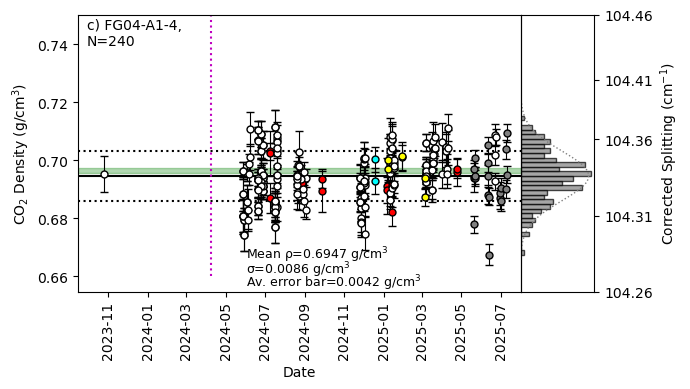

In [107]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import DiadFit as pf



# Create figure and layout
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 0.5], wspace=0)

# === Left plot: density over time ===
ax1 = plt.subplot(gs[0])

# PW
ax1.errorbar(df_a14['date'][df_a14['Operator'] == 'PW'],
             df_a14['Density g/cm3'][df_a14['Operator'] == 'PW'],
             yerr=df_a14['σ Density g/cm3'][df_a14['Operator'] == 'PW'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='PW')

# CLJD
ax1.errorbar(df_a14['date'][df_a14['Operator'] == 'CLJD'],
             df_a14['Density_no_neon'][df_a14['Operator'] == 'CLJD'],
             yerr=df_a14['σ Density g/cm3'][df_a14['Operator'] == 'CLJD'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='white', ms=5, mec='k', capsize=3, label='CD')


ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'Henry'], 
         df_a14['Density_no_neon'].loc[df_a14['Operator'] == 'Henry'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'Henry'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='yellow', ms=5, mec='k', capsize=3, label='HZ')

ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'MLMG'], 
         df_a14['Density_no_neon'].loc[df_a14['Operator'] == 'MLMG'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'MLMG'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='MG')


ax1.errorbar(df_a14['date'].loc[df_a14['Operator'] == 'IS'], 
         df_a14['Density_no_neon'].loc[df_a14['Operator'] == 'IS'], 
       yerr= df_a14['σ Density g/cm3'].loc[df_a14['Operator'] == 'IS'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='grey', ms=5, mec='k', capsize=3, label='MG')





# Axis labels
ax1.set_xlabel('Date')
ax1.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Set x limits

ax1.set_xlim([early, late])

# Horizontal mean and ±std lines
mean_rho = np.nanmean(df_a14['Density_no_neon'])
std_rho = np.nanstd(df_a14['Density_no_neon'])
ax1.hlines(mean_rho, early, late, color='k')
ax1.hlines(mean_rho + std_rho, early, late, linestyle=':', color='k')
ax1.hlines(mean_rho - std_rho, early, late, linestyle=':', color='k')

# Annotations
ax1.annotate("c) FG04-A1-4,\nN=" + str(len(df_a14)), xy=(0.02, 0.89), xycoords="axes fraction", fontsize=10)
ax1.annotate(f"Mean ρ={mean_rho:.4f} g/cm$^3$", xy=(0.38, 0.12), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"σ={std_rho:.4f} g/cm$^3$", xy=(0.38, 0.065), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"Av. error bar={np.nanmean(df_a14['σ Density g/cm3']):.4f} g/cm$^3$",
             xy=(0.38, 0.02), xycoords="axes fraction", fontsize=9)

# === Right plot: histogram ===
ax2 = plt.subplot(gs[1], sharey=ax1)
ax2.hist(df_a14['Density_no_neon'].dropna(), bins=30, orientation='horizontal',
         color='gray', alpha=0.7, edgecolor='black')

# No y-axis on ax2
ax2.yaxis.set_visible(False)
ax2.xaxis.set_ticks([])
ax2.set_frame_on(False)

# === Right-side axis: corrected splitting ===
lower_split=np.nanmin(df_a14['Corrected_Splitting'])-0.02
upper_split=np.nanmax(df_a14['Corrected_Splitting'])+0.02
import DiadFit as pf
rho_min=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=lower_split, 
split_err=0)['Density g/cm3'][0]
rho_max=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=upper_split, 
split_err=0)['Density g/cm3'][0]

ax1.plot([date_recal, date_recal], [0.66, 0.79], ':m')


# Create new axis on right of histogram
ax1.set_ylim([rho_min, rho_max])
ax3 = ax2.twinx()
ax3.set_ylim([rho_min, rho_max])

# Set label and ticks
ax3.set_ylabel("Corrected Splitting (cm$^{-1}$)")
splitting_ticks = np.linspace(lower_split, upper_split, 5)
# Convert splitting ticks to matching densities
splitting_tick_labels = [f"{val:.2f}" for val in splitting_ticks]
density_for_ticks = [pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=val, split_err=0)['Density g/cm3'][0]
                     for val in splitting_ticks]

ax3.set_yticks(density_for_ticks)
ax3.set_yticklabels(splitting_tick_labels, ha='right')  # Right-justified

# Move axis slightly outward
ax3.spines["right"].set_position(("axes", 1))
ax3.spines["right"].set_visible(True)
ax3.yaxis.set_label_position('right')
ax3.yaxis.set_ticks_position('right')

# Plot normal curve on histogram
mean = mean_rho
std = std_rho
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
y = norm.pdf(x, mean, std) * 0.5
ax2.plot(y, x, color='grey', linewidth=1, linestyle=':')

date_recal=datetime(2024, 4, 8)


## Lets calculate the density for microtherm
lower_rho=df_Tm['Lower_rho'].loc[df_Tm['Sample']=='FG04-A1-4'].iloc[0]
upper_rho=df_Tm['Upper_rho'].loc[df_Tm['Sample']=='FG04-A1-4'].iloc[0]
# Define the rectangle
import matplotlib.patches as patches
rect = patches.Rectangle((early, lower_rho),  # Bottom-left corner (x, y)
                         width=late - early,
                         height=upper_rho - lower_rho,
                         color='green',
                         alpha=0.3)  # Optional transparency

# Add to the axis
ax1.add_patch(rect)



# Save and show
fig.tight_layout()
plt.show()
fig.savefig('FG_a1_a4_repeats_clean_withNeon.png', transparent=True, dpi=300)


## 101 A using typical Neon correction

C:\Users\penny\AppData\Local\Temp\ipykernel_15704\3141965002.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


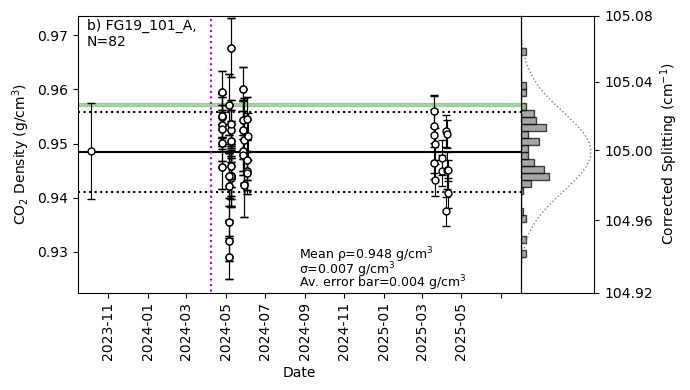

In [108]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import DiadFit as pf

# Filtered DataFrame
df_a101 = df.loc[((df['Standard_Name'] == 'FG19_101_A') |(df['Standard_Name'] == 'FG19-101-A')) & (df['Operator'] != 'ATB')]

# Create figure and layout
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 0.5], wspace=0)

# === Left plot: density over time ===
ax1 = plt.subplot(gs[0])

# PW
ax1.errorbar(df_a101['date'][df_a101['Operator'] == 'PW'],
             df_a101['Density g/cm3'][df_a101['Operator'] == 'PW'],
             yerr=df_a101['σ Density g/cm3'][df_a101['Operator'] == 'PW'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='PW')

# CLJD
ax1.errorbar(df_a101['date'][df_a101['Operator'] == 'CLJD'],
             df_a101['Density g/cm3'][df_a101['Operator'] == 'CLJD'],
             yerr=df_a101['σ Density g/cm3'][df_a101['Operator'] == 'CLJD'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='white', ms=5, mec='k', capsize=3, label='CD')


ax1.errorbar(df_a101['date'].loc[df_a101['Operator'] == 'Henry'], 
         df_a101['Density g/cm3'].loc[df_a101['Operator'] == 'Henry'], 
       yerr= df_a101['σ Density g/cm3'].loc[df_a101['Operator'] == 'Henry'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='yellow', ms=5, mec='k', capsize=3, label='HZ')

ax1.errorbar(df_a101['date'].loc[df_a101['Operator'] == 'MLMG'], 
         df_a101['Density g/cm3'].loc[df_a101['Operator'] == 'MLMG'], 
       yerr= df_a101['σ Density g/cm3'].loc[df_a101['Operator'] == 'MLMG'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='MG')





# Axis labels
ax1.set_xlabel('Date')
ax1.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Set x limits

ax1.set_xlim([early, late])

# Horizontal mean and ±std lines
mean_rho = np.nanmean(df_a101['Density g/cm3'])
std_rho = np.nanstd(df_a101['Density g/cm3'])
ax1.hlines(mean_rho, early, late, color='k')
ax1.hlines(mean_rho + std_rho, early, late, linestyle=':', color='k')
ax1.hlines(mean_rho - std_rho, early, late, linestyle=':', color='k')

# Annotations
ax1.annotate("b) FG19_101_A,\nN=" + str(len(df_a101)), xy=(0.02, 0.89), xycoords="axes fraction", fontsize=10)
ax1.annotate(f"Mean ρ={mean_rho:.3f} g/cm$^3$", xy=(0.5, 0.12), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"σ={std_rho:.3f} g/cm$^3$", xy=(0.5, 0.065), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"Av. error bar={np.nanmean(df_a101['σ Density g/cm3']):.3f} g/cm$^3$",
             xy=(0.5, 0.02), xycoords="axes fraction", fontsize=9)

# === Right plot: histogram ===
ax2 = plt.subplot(gs[1], sharey=ax1)
ax2.hist(df_a101['Density g/cm3'].dropna(), bins=30, orientation='horizontal',
         color='gray', alpha=0.7, edgecolor='black')

# No y-axis on ax2
ax2.yaxis.set_visible(False)
ax2.xaxis.set_ticks([])
ax2.set_frame_on(False)

# === Right-side axis: corrected splitting ===
lower_split=np.nanmin(df_a101['Corrected_Splitting'])-0.02
upper_split=np.nanmax(df_a101['Corrected_Splitting'])+0.02
import DiadFit as pf
rho_min=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=lower_split, 
split_err=0)['Density g/cm3'][0]
rho_max=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=upper_split, 
split_err=0)['Density g/cm3'][0]
date_recal=datetime(2024, 4, 8)
ax1.plot([date_recal, date_recal], [0.66, 1], ':m')


# Create new axis on right of histogram
ax1.set_ylim([rho_min, rho_max])
ax3 = ax2.twinx()
ax3.set_ylim([rho_min, rho_max])

# Set label and ticks
ax3.set_ylabel("Corrected Splitting (cm$^{-1}$)")
splitting_ticks = np.linspace(lower_split, upper_split, 5)
# Convert splitting ticks to matching densities
splitting_tick_labels = [f"{val:.2f}" for val in splitting_ticks]
density_for_ticks = [pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=val, split_err=0)['Density g/cm3'][0]
                     for val in splitting_ticks]

ax3.set_yticks(density_for_ticks)
ax3.set_yticklabels(splitting_tick_labels, ha='right')  # Right-justified

# Move axis slightly outward
ax3.spines["right"].set_position(("axes", 1))
ax3.spines["right"].set_visible(True)
ax3.yaxis.set_label_position('right')
ax3.yaxis.set_ticks_position('right')

# Plot normal curve on histogram
mean = mean_rho
std = std_rho
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
y = norm.pdf(x, mean, std) * 0.5
ax2.plot(y, x, color='grey', linewidth=1, linestyle=':')


## Lets calculate the density for microtherm
lower_rho=df_Tm['Lower_rho'].loc[df_Tm['Sample']=='FG19-101-A'].iloc[0]
upper_rho=df_Tm['Upper_rho'].loc[df_Tm['Sample']=='FG19-101-A'].iloc[0]
# Define the rectangle
import matplotlib.patches as patches
rect = patches.Rectangle((early, lower_rho),  # Bottom-left corner (x, y)
                         width=late - early,
                         height=upper_rho - lower_rho,
                         color='green',
                         alpha=0.3)  # Optional transparency

# Add to the axis
ax1.add_patch(rect)



# Save and show
fig.tight_layout()
plt.show()
fig.savefig('101_repeats_clean.png', dpi=300)


### Using average Neon

C:\Users\penny\AppData\Local\Temp\ipykernel_15704\1622405434.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


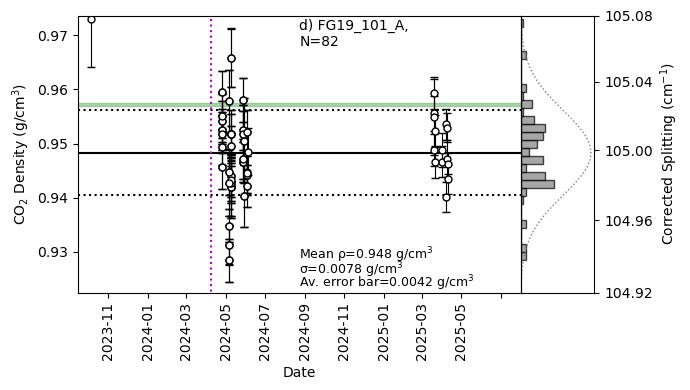

In [117]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import DiadFit as pf

# Filtered DataFrame


# Create figure and layout
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 0.5], wspace=0)

# === Left plot: density over time ===
ax1 = plt.subplot(gs[0])

# PW
ax1.errorbar(df_a101['date'][df_a101['Operator'] == 'PW'],
             df_a101['Density_no_neon'][df_a101['Operator'] == 'PW'],
             yerr=df_a101['σ Density g/cm3'][df_a101['Operator'] == 'PW'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='PW')

# CLJD
ax1.errorbar(df_a101['date'][df_a101['Operator'] == 'CLJD'],
             df_a101['Density_no_neon'][df_a101['Operator'] == 'CLJD'],
             yerr=df_a101['σ Density g/cm3'][df_a101['Operator'] == 'CLJD'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='white', ms=5, mec='k', capsize=3, label='CD')


ax1.errorbar(df_a101['date'].loc[df_a101['Operator'] == 'Henry'], 
         df_a101['Density_no_neon'].loc[df_a101['Operator'] == 'Henry'], 
       yerr= df_a101['σ Density g/cm3'].loc[df_a101['Operator'] == 'Henry'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='yellow', ms=5, mec='k', capsize=3, label='HZ')

ax1.errorbar(df_a101['date'].loc[df_a101['Operator'] == 'MLMG'], 
         df_a101['Density_no_neon'].loc[df_a101['Operator'] == 'MLMG'], 
       yerr= df_a101['σ Density g/cm3'].loc[df_a101['Operator'] == 'MLMG'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='MG')





# Axis labels
ax1.set_xlabel('Date')
ax1.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Set x limits

ax1.set_xlim([early, late])

# Horizontal mean and ±std lines
mean_rho = np.nanmean(df_a101['Density_no_neon'])
std_rho = np.nanstd(df_a101['Density_no_neon'])
ax1.hlines(mean_rho, early, late, color='k')
ax1.hlines(mean_rho + std_rho, early, late, linestyle=':', color='k')
ax1.hlines(mean_rho - std_rho, early, late, linestyle=':', color='k')

# Annotations
ax1.annotate("d) FG19_101_A,\nN=" + str(len(df_a101)), xy=(0.5, 0.89), xycoords="axes fraction", fontsize=10)
ax1.annotate(f"Mean ρ={mean_rho:.3f} g/cm$^3$", xy=(0.5, 0.12), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"σ={std_rho:.4f} g/cm$^3$", xy=(0.5, 0.065), xycoords="axes fraction", fontsize=9)
ax1.annotate(f"Av. error bar={np.nanmean(df_a101['σ Density g/cm3']):.4f} g/cm$^3$",
             xy=(0.5, 0.02), xycoords="axes fraction", fontsize=9)

# === Right plot: histogram ===
ax2 = plt.subplot(gs[1], sharey=ax1)
ax2.hist(df_a101['Density_no_neon'].dropna(), bins=30, orientation='horizontal',
         color='gray', alpha=0.7, edgecolor='black')

# No y-axis on ax2
ax2.yaxis.set_visible(False)
ax2.xaxis.set_ticks([])
ax2.set_frame_on(False)

# === Right-side axis: corrected splitting ===
lower_split=np.nanmin(df_a101['Corrected_Splitting'])-0.02
upper_split=np.nanmax(df_a101['Corrected_Splitting'])+0.02
import DiadFit as pf
rho_min=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=lower_split, 
split_err=0)['Density g/cm3'][0]
rho_max=pf.calculate_density_ucb(Ne_line_combo='1117_1447',  corrected_split=upper_split, 
split_err=0)['Density g/cm3'][0]
date_recal=datetime(2024, 4, 8)
ax1.plot([date_recal, date_recal], [0.66, 1], ':m')


# Create new axis on right of histogram
ax1.set_ylim([rho_min, rho_max])
ax3 = ax2.twinx()
ax3.set_ylim([rho_min, rho_max])

# Set label and ticks
ax3.set_ylabel("Corrected Splitting (cm$^{-1}$)")
splitting_ticks = np.linspace(lower_split, upper_split, 5)
# Convert splitting ticks to matching densities
splitting_tick_labels = [f"{val:.2f}" for val in splitting_ticks]
density_for_ticks = [pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=val, split_err=0)['Density g/cm3'][0]
                     for val in splitting_ticks]

ax3.set_yticks(density_for_ticks)
ax3.set_yticklabels(splitting_tick_labels, ha='right')  # Right-justified

# Move axis slightly outward
ax3.spines["right"].set_position(("axes", 1))
ax3.spines["right"].set_visible(True)
ax3.yaxis.set_label_position('right')
ax3.yaxis.set_ticks_position('right')

# Plot normal curve on histogram
mean = mean_rho
std = std_rho
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
y = norm.pdf(x, mean, std) * 0.5
ax2.plot(y, x, color='grey', linewidth=1, linestyle=':')


## Lets calculate the density for microtherm
lower_rho=df_Tm['Lower_rho'].loc[df_Tm['Sample']=='FG19-101-A'].iloc[0]
upper_rho=df_Tm['Upper_rho'].loc[df_Tm['Sample']=='FG19-101-A'].iloc[0]
# Define the rectangle
import matplotlib.patches as patches
rect = patches.Rectangle((early, lower_rho),  # Bottom-left corner (x, y)
                         width=late - early,
                         height=upper_rho - lower_rho,
                         color='green',
                         alpha=0.3)  # Optional transparency

# Add to the axis
ax1.add_patch(rect)



# Save and show

fig.tight_layout()
plt.show()
fig.savefig('101_repeats_clean_NoNeon.png', transparent=True,dpi=300)
